# Stochastic model of stem cell dynamics 

1. Stem cells are known because of their repopulation capacity. They are able to differentiate and grow the stem compartment keeping a balance over time.
2. Their ability to divide asymmetrically to produce one stem and one non-stem daughter cell is often considered to be one of the defining characteristics of stemness, however, it is also known that symmetrical divisions are part of stemness.
3. The asymmetric model suggests that the homeostatic control of the stem cell pool is maintained at the level of single cells, whereby each stem cell produces a copy of itself plus one differentiated cell.  An obvious disadvantage is its inability to replenish the stem cell pool in case of injury. This problem is naturally solved by the symmetric model, which maintains homeostatic control at the population level, rather than at the individual cell level. 
4. Stochastic processes have been studied in biological mechanisms and how this has an effect on them. Stem cell dynamics present stochasticity because individual cells progress in an uncoordinated, stochastic manner.
5. In this simulation, I intend to show a stochastic model of stem cell dynamics where they can divide symmetrically or asymmetrically, they can die based on a probability and they have a frequency of division based on a division_probability. The stochastic processes are controlled by the random seed.
6. While stem cell dynamics is a really complex biology topic, this simulation following specific parameters shows a balance between the stem cell compartment and differentiated cells over time. The different probabilities can be modified for various purposes, like showing depletion of stem cell compartment, etc.



### Importing libraries

In [12]:
import random 
import matplotlib.pyplot as plt 
import numpy as np

### Main simulation 

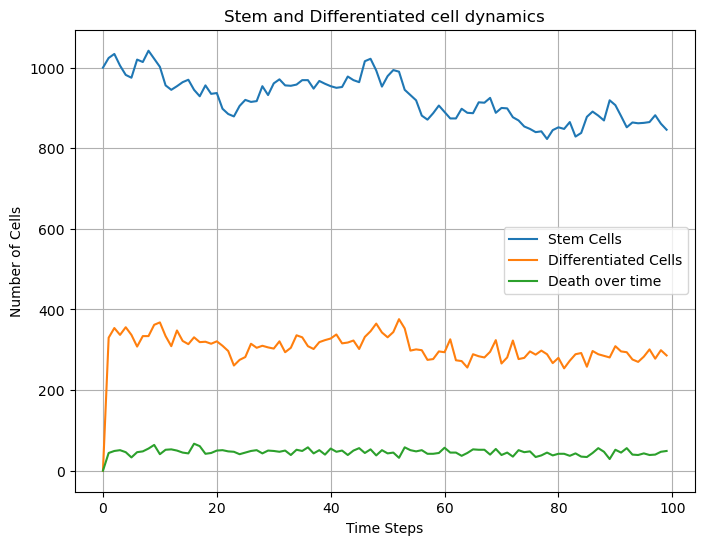

In [13]:
def simulation(initial_stem_cells, division_probability, assymmetrical_division_probability, death_probability, seed):
    """
    Stem cells division and differentiation simulation 
    
    Parameters:
    initial_stem_cells: Number of initial stem cells in the simulation.
    division_probability: Probability of division of the stem cells, based on biological mechanisms.
    assymmetrical_division_probability: Probability of assymmetrical division when 1 stem cell----> 1 stem cell + 1 differentiated cell.
    death_probability: Probability of dying for stem cells per time step.
    seed (int): Random seed for reproducibility.
    
    Assumption:
    The division probability simulates the quiescence of cells initially as well as the probability of divide for the active stem cells

    Returns:
    tuple: Contains lists of stem_cells, differentiated_cells, deaths over time 
    """
    
    # Random seed for reproducibility
    random.seed(seed)

    # Initial states 
    initial_stem_cells = initial_stem_cells
    initial_divided_cells = 0
    non_initial_divided_cells = 0

    # Simulating quiescent state of stem cells 
    for cell in range(initial_stem_cells):
        if random.random() < division_probability:
            initial_divided_cells += 1
        else:
            non_initial_divided_cells += 1
        
    #print(f"Number of initial stem cells is {initial_stem_cells}")
    #print(f"Number of initial stem cells divided is {initial_divided_cells}")
    #print(f"Number of quiescent cells is {non_initial_divided_cells}")
    
    # Parameters of the main simulation:
    stem_cells = [initial_stem_cells]  # Establishing initial array for stem cells 
    differentiated_cells = [0]      # Establishing initial array for differentiated cells 
    no_division = [0]   # Establishing initial array for not_divided cells  
    deaths = [0]    # Establishing initial array for death cells 
    
    # Simulating the model over time
    for time_step in range(1, 100):     # Number of steps can be changed as needed
        current_stem_cells = 0       # Temporary lists
        current_differentiated_cells = 0
        not_divided_stem_cells = 0
        current_deaths = 0

        # Evaluate death for all stem cells
        surviving_stem_cells = 0
        for cell in range(stem_cells[-1]):
            if random.random() < death_probability:   # Random probability of division 
                current_deaths += 1
            else:
                surviving_stem_cells += 1
        
        # Simulating division for the surviving cells 
        for cell in range(surviving_stem_cells):
            if random.random() < division_probability:    # Random probability of division 
                if random.random() < assymmetrical_division_probability:   # Random probability of assymmetrical division 
                    current_stem_cells += 1
                    current_differentiated_cells += 1
                else:      # Random probability of symmetrical division 
                    current_stem_cells += 2
            else:        # Updating the not division array 
                not_divided_stem_cells += 1

        # Updating the arrays over time 
        stem_cells.append(current_stem_cells)
        differentiated_cells.append(current_differentiated_cells)
        no_division.append(not_divided_stem_cells)
        deaths.append(current_deaths)
        #print(f"Time step {time_step}: Stem Cells: {current_stem_cells}, Differentiated Cells: {current_differentiated_cells}, No division: {not_divided_stem_cells}, Deaths: {current_deaths}")
    
    return stem_cells, differentiated_cells, deaths


# Running the main simulation
initial_stem_cells = 1000 
division_probability = 0.7  # """The division probability of stem cell could be modified but no more than 0.7 biologically speaking """
assymmetrical_division_probability = 0.5
death_probability = 0.05   # """ Stem cells turnover is aproximately 5% per day """
seed = 42
stem_cells, differentiated_cells, deaths = simulation(initial_stem_cells , division_probability, 
                                                      assymmetrical_division_probability, death_probability,seed)

# Plotting results
plt.figure(figsize=(8, 6))
plt.plot(stem_cells, label='Stem Cells')
plt.plot(differentiated_cells, label='Differentiated Cells')
plt.plot(deaths, label='Death over time')
plt.xlabel('Time Steps')
plt.ylabel('Number of Cells')
plt.title('Stem and Differentiated cell dynamics')
plt.legend()
plt.grid()
plt.show()

mean_stem_cells: 923.85
median_stem_cells: 919.5
std_stem_cells: 54.61600040281236
max_stem_cells: 1042
min_stem_cells: 823
mean_differentiated_cells: 303.69
median_differentiated_cells: 302.5
std_differentiated_cells: 40.74744041041105
max_differentiated_cells: 376
min_differentiated_cells: 0
mean_deaths: 45.83
median_deaths: 46.0
std_deaths: 8.288612670405103
max_deaths: 67
min_deaths: 0


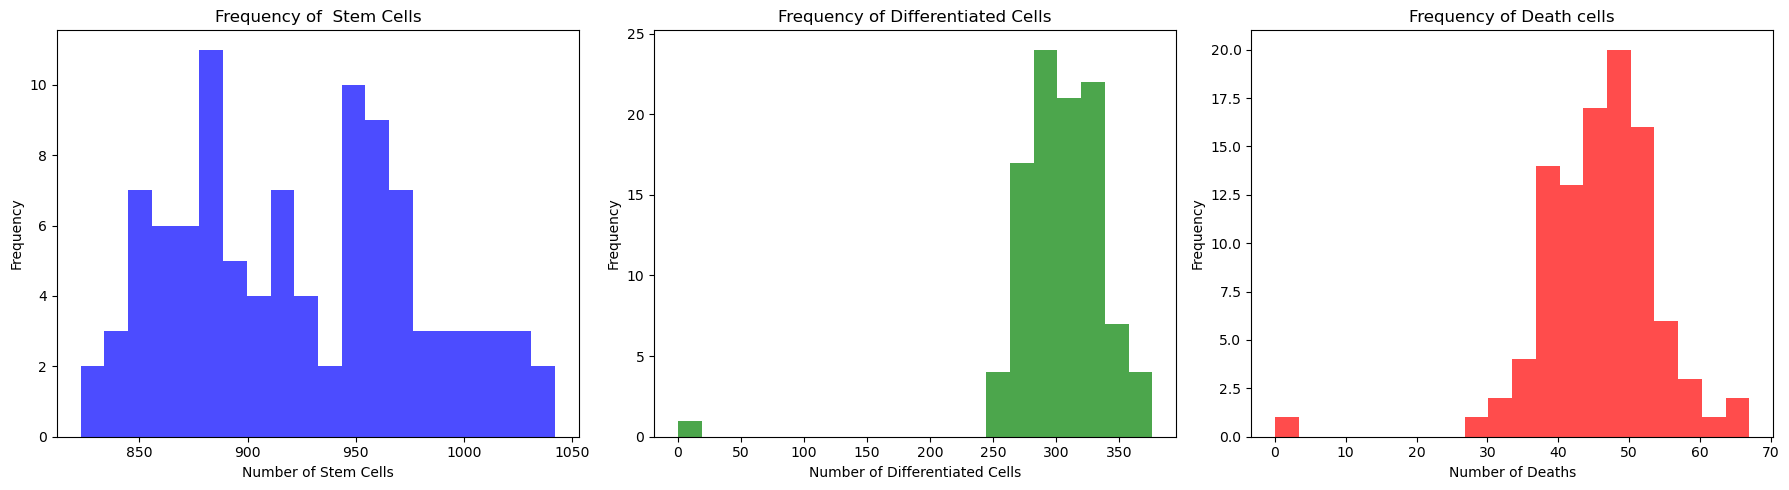

In [14]:
# Calculating different statistics 
def calculate_statistics(stem_cells, differentiated_cells, deaths):
    # Convert lists to numpy arrays for easier statistical calculations
    stem_cells = np.array(stem_cells)
    differentiated_cells = np.array(differentiated_cells)
    deaths = np.array(deaths)

    # Descriptive statistics
    stats = {
        "mean_stem_cells": np.mean(stem_cells),
        "median_stem_cells": np.median(stem_cells),
        "std_stem_cells": np.std(stem_cells),
        "max_stem_cells": np.max(stem_cells),
        "min_stem_cells": np.min(stem_cells),
        "mean_differentiated_cells": np.mean(differentiated_cells),
        "median_differentiated_cells": np.median(differentiated_cells),
        "std_differentiated_cells": np.std(differentiated_cells),
        "max_differentiated_cells": np.max(differentiated_cells),
        "min_differentiated_cells": np.min(differentiated_cells),
        "mean_deaths": np.mean(deaths),
        "median_deaths": np.median(deaths),
        "std_deaths": np.std(deaths),
        "max_deaths": np.max(deaths),
        "min_deaths": np.min(deaths),
    }

    return stats

# Plotting 
def plot_histograms(stem_cells, differentiated_cells, deaths):
    # Convert lists to numpy arrays
    stem_cells = np.array(stem_cells)
    differentiated_cells = np.array(differentiated_cells)
    deaths = np.array(deaths)

    # Plot histograms
    plt.figure(figsize=(18, 5))

    plt.subplot(1, 3, 1)
    plt.hist(stem_cells, bins=20, color='blue', alpha=0.7)
    plt.xlabel('Number of Stem Cells')
    plt.ylabel('Frequency')
    plt.title('Frequency of  Stem Cells')

    plt.subplot(1, 3, 2)
    plt.hist(differentiated_cells, bins=20, color='green', alpha=0.7)
    plt.xlabel('Number of Differentiated Cells')
    plt.ylabel('Frequency')
    plt.title('Frequency of Differentiated Cells')

    plt.subplot(1, 3, 3)
    plt.hist(deaths, bins=20, color='red', alpha=0.7)
    plt.xlabel('Number of Deaths')
    plt.ylabel('Frequency')
    plt.title('Frequency of Death cells')

    plt.tight_layout()
    plt.show()

# Calculating statistics
stats = calculate_statistics(stem_cells, differentiated_cells, deaths)

# Print statistics
for key, value in stats.items():
    print(f"{key}: {value}")

# Plot histograms
plot_histograms(stem_cells, differentiated_cells, deaths)

### Evaluating stochasticity in stem and differentiated cell 

In [15]:
# Generating a function to create different seeds 
def generate_seeds(num_seeds):
    """Generate a list of random seeds."""
    return [random.randint(0, 1000000) for _ in range(num_seeds)]

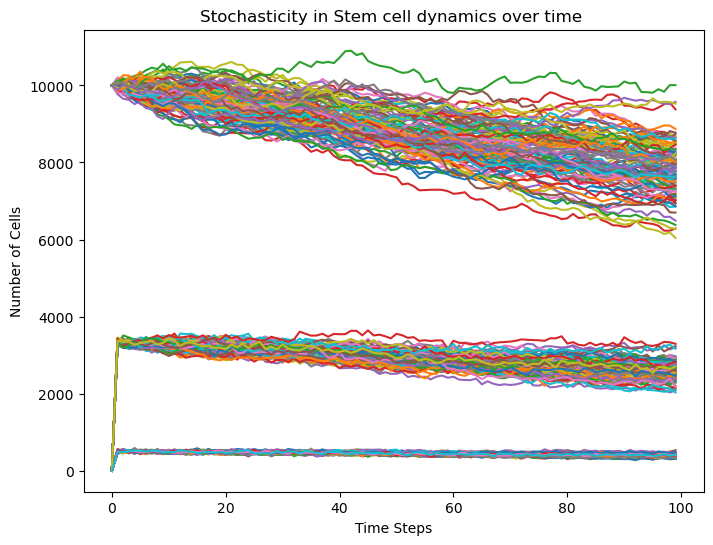

In [16]:
# Running the main simulation with different seeds 
def run_simulations_with_seeds(initial_stem_cells, division_probability, assymmetrical_division_probability, death_probability, num_seeds):
    random.seed(42)
    seeds = generate_seeds(num_seeds)
    # Run simulations for different seeds and store results
    results = []
    for seed in seeds:
        stem_cells, differentiated_cells, deaths = simulation(initial_stem_cells, division_probability, 
                                                              assymmetrical_division_probability, death_probability, seed)
        results.append((stem_cells, differentiated_cells, deaths))

    # Plotting results
    plt.figure(figsize=(8, 6))
    for i, (stem_cells, differentiated_cells, deaths) in enumerate(results):
        plt.plot(stem_cells)
        plt.plot(differentiated_cells)
        plt.plot(deaths)

    plt.xlabel('Time Steps')
    plt.ylabel('Number of Cells')
    plt.title('Stochasticity in Stem cell dynamics over time ')
    #plt.legend()
    plt.show()

# Parameters

initial_stem_cells = 10000
division_probability = 0.7
assymmetrical_division_probability = 0.5
death_probability = 0.05
num_seeds = 100  # Number of different random seeds

# Run the simulations with the specified number of seeds
run_simulations_with_seeds(initial_stem_cells,division_probability, assymmetrical_division_probability, death_probability, num_seeds)
